## Dimensional Reduction with PCA

this dataset contains

In [12]:
# lets use pandas to load the dataset!
import pandas as pd

data = pd.read_csv('cereal_norm.csv')
data.head()

,calories,carbo,cups,fat,fiber,potass,protein,rating,sodium,sugars,vitamins,weight,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,name
0,0.181818,0.250000,0.064,0.2,0.714286,0.848943,0.6,0.665593,0.406250,0.4375,0.25,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100% Bran
1,0.636364,0.375000,0.600,1.0,0.142857,0.410876,0.4,0.210685,0.046875,0.5625,0.00,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100% Natural Bran
2,0.181818,0.333333,0.064,0.2,0.642857,0.969789,0.6,0.546941,0.812500,0.3750,0.25,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,All-Bran
3,0.000000,0.375000,0.200,0.0,1.000000,1.000000,0.6,1.000000,0.437500,0.0625,0.25,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,All-Bran with Extra Fiber
4,0.545455,0.625000,0.400,0.4,0.071429,0.000000,0.2,0.215987,0.625000,0.5625,0.25,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Almond Delight


In [13]:
name =  data.name
data = data[data.columns.difference(['name'])]
print(data.shape)
data.head()

(77, 19)


,calories,carbo,cups,fat,fiber,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,potass,protein,rating,sodium,sugars,type_H,vitamins,weight
0,0.181818,0.250000,0.064,0.2,0.714286,0.0,0.0,1.0,0.0,0.0,0.0,0.848943,0.6,0.665593,0.406250,0.4375,0.0,0.25,0.5
1,0.636364,0.375000,0.600,1.0,0.142857,0.0,0.0,0.0,0.0,1.0,0.0,0.410876,0.4,0.210685,0.046875,0.5625,0.0,0.00,0.5
2,0.181818,0.333333,0.064,0.2,0.642857,0.0,1.0,0.0,0.0,0.0,0.0,0.969789,0.6,0.546941,0.812500,0.3750,0.0,0.25,0.5
3,0.000000,0.375000,0.200,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.6,1.000000,0.437500,0.0625,0.0,0.25,0.5
4,0.545455,0.625000,0.400,0.4,0.071429,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.2,0.215987,0.625000,0.5625,0.0,0.25,0.5


In [18]:
### Lets use Principal Component Analisis to Reduce Dimensions from 19D to 2D
import numpy as np
from sklearn.decomposition import PCA

# reduce to 2 components
pca = PCA(n_components=2)
pca_transform =  pca.fit_transform(data)

pca_transform

array([[ 0.32035429,  0.76111904],
       [-0.03922438,  0.64831058],
       [ 0.82161511, -0.25001414],
       [ 1.02744299,  0.09111693],
       [-0.09731619,  0.17998217],
       [-0.79733552, -0.22268103],
       [ 0.57031256, -0.53402214],
       [-0.76479286, -0.28177069],
       [ 0.03522862,  0.30965887],
       [ 0.12998018,  0.41744789],
       [-0.15739043,  0.21826089],
       [-0.68951022, -0.08909982],
       [-0.88633368, -0.30953498],
       [-0.70343046, -0.079972  ],
       [-0.84813704, -0.3297321 ],
       [-0.04932892,  0.16886298],
       [ 0.6117057 , -0.47323171],
       [ 0.57918064, -0.48113687],
       [-0.84657587, -0.32966134],
       [ 0.64046047, -0.34672779],
       [ 0.21613199,  0.90580758],
       [ 0.62539897, -0.43459471],
       [-0.72481065, -0.14389747],
       [ 0.01548708,  0.27881047],
       [ 0.54929614, -0.51905676],
       [ 0.55248636, -0.57919385],
       [ 0.76665057, -0.17731418],
       [ 0.0312453 ,  0.26774788],
       [ 0.65411118,

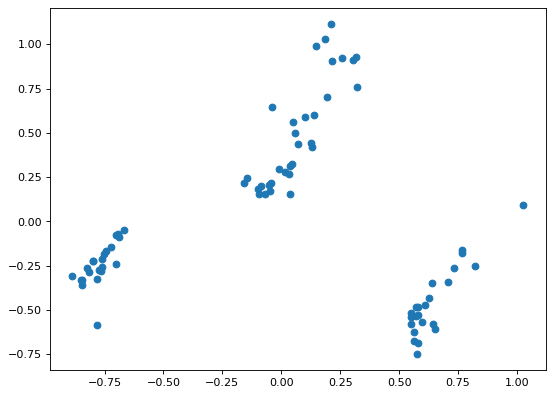

In [22]:
# display this data into a 2D scatter plot with matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(pca_transform[:, 0], pca_transform[:, 1])

In [23]:
### Save data to CSV for machine learning clustering... 

data_pca = pd.DataFrame({'A': pca_transform[:, 0], 'B': pca_transform[:, 1], 'name' : name})
data_pca.head()

,A,B,name
0,0.320354,0.761119,100% Bran
1,-0.039224,0.648311,100% Natural Bran
2,0.821615,-0.250014,All-Bran
3,1.027443,0.091117,All-Bran with Extra Fiber
4,-0.097316,0.179982,Almond Delight


In [25]:
# save this for machine learning
data_pca.to_csv("cereal_pca.csv", index = False)